# PART  -  3/3(FINAL) FOR RF :-

In [1]:
#importing libraries

from selenium import webdriver
from bs4 import BeautifulSoup
import chromedriver_binary
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from time import sleep
from nltk import word_tokenize
from nltk.corpus import stopwords
% matplotlib inline

In [2]:
df_rf = pd.read_csv(r'result_for_mda_and_qqdmr.csv')
df_rf.columns

Index(['CIK', 'CONAME', 'FYRMO', 'FDATE', 'FORM', 'SECFNAME',
       'mda_positive_score', 'mda_negative_score', 'mda_polarity_score',
       'mda_average_sentence_length', 'mda_percentage_of_complex_words',
       'mda_fog_index', 'mda_complex_word_count', 'mda_word_count',
       'mda_uncertainty_score', 'mda_constraining_score',
       'mda_positive_word_proportion', 'mda_negative_word_proportion',
       'mda_uncertainty_word_proportion', 'mda_constraining_word_proportion',
       'qqdmr_positive_score', 'qqdmr_negative_score', 'qqdmr_polarity_score',
       'qqdmr_average_sentence_length', 'qqdmr_percentage_of_complex_words',
       'qqdmr_fog_index', 'qqdmr_complex_word_count', 'qqdmr_word_count',
       'qqdmr_uncertainty_score', 'qqdmr_constraining_score',
       'qqdmr_positive_word_proportion', 'qqdmr_negative_word_proportion',
       'qqdmr_uncertainty_word_proportion',
       'qqdmr_constraining_word_proportion', 'rf_positive_score',
       'rf_negative_score', 'rf_polarity

In [3]:
df_rf.head(3)

,CIK,CONAME,FYRMO,FDATE,FORM,SECFNAME,mda_positive_score,mda_negative_score,mda_polarity_score,mda_average_sentence_length,...,rf_fog_index,rf_complex_word_count,rf_word_count,rf_uncertainty_score,rf_constraining_score,rf_positive_word_proportion,rf_negative_word_proportion,rf_uncertainty_word_proportion,rf_constraining_word_proportion,constraining_words_whole_report
0,3662,SUNBEAM CORP/FL/,199803,06-03-98,10-K405,https://www.sec.gov/Archives/edgar/data/3662/0...,5.0,15.0,-0.500000,13.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.0
1,3662,SUNBEAM CORP/FL/,199805,15-05-98,10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...,3.0,26.0,-0.793103,12.323529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1044.0
2,3662,SUNBEAM CORP/FL/,199808,13-08-98,NT 10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


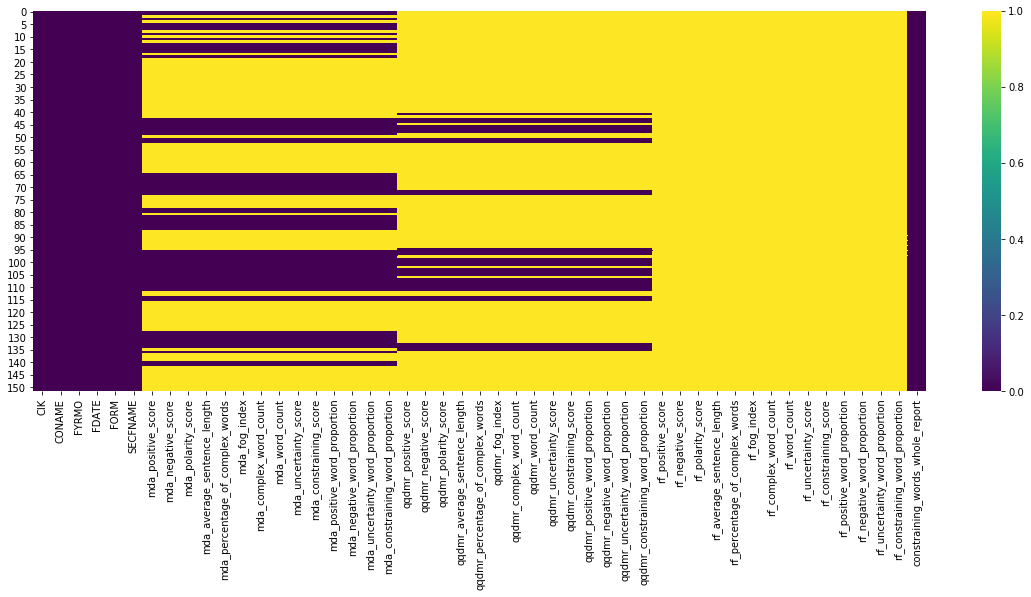

In [4]:
plt.figure(figsize=(20,7))
sns.heatmap(df_rf.isnull(), cmap='viridis')

### calculate the rf_positive_score :

In [5]:
def rf_positive_score_fn(super_final_content_extract_rf_list_with_stopwords_removed, positive_words):
    no_of_postive_words = 0
    for i in range(0, len(super_final_content_extract_rf_list_with_stopwords_removed)):
        if super_final_content_extract_rf_list_with_stopwords_removed[i] in positive_words:
            no_of_postive_words += 1
    return no_of_postive_words

### calculate the rf_negative_score :

In [6]:
def rf_negative_score_fn(super_final_content_extract_rf_list_with_stopwords_removed, negative_words):
    no_of_negative_words = 0
    for i in range(0, len(super_final_content_extract_rf_list_with_stopwords_removed)):
        if super_final_content_extract_rf_list_with_stopwords_removed[i] in negative_words:
            no_of_negative_words += 1
    return no_of_negative_words

### calculate the rf_polarity_score :

In [7]:
def rf_polarity_score_fn(super_final_content_extract_rf_list_with_stopwords_removed, rf_positive_score, rf_negative_score):
    num = (rf_positive_score - rf_negative_score)
    den = ((rf_positive_score + rf_negative_score) + 0.000001)
    rf_polarity_score = num/den
    return rf_polarity_score

### calculate the rf_average_sentence_length :

In [8]:
def rf_average_sentence_length_fn(no_of_sentences, super_final_content_extract_rf_list_with_stopwords_removed):
    return (len(super_final_content_extract_rf_list_with_stopwords_removed)/no_of_sentences)
    

### calculate the rf_uncertainity_score :

In [9]:
def rf_uncertainty_score_fn(super_final_content_extract_rf_list_with_stopwords_removed):
    no_of_uncertain_words = 0
    for i in range(0, len(super_final_content_extract_rf_list_with_stopwords_removed)):
        if super_final_content_extract_rf_list_with_stopwords_removed[i] in uncertain_words:
            no_of_uncertain_words += 1
            
    return (no_of_uncertain_words)

### calculate the rf_constraining_score :

In [10]:
def rf_constraining_score_fn(super_final_content_extract_rf_list_with_stopwords_removed):
    no_of_constrain_words = 0
    for i in range(0, len(super_final_content_extract_rf_list_with_stopwords_removed)):
        if super_final_content_extract_rf_list_with_stopwords_removed[i] in constrain_words:
            no_of_constrain_words += 1
            
    return (no_of_constrain_words)

### calculate the rf_complex_word_count :

In [11]:
def rf_complex_word_count_fn(super_final_content_extract_rf_list_with_stopwords_removed):
    vowels = ['a','e','i','o','u']

    complex_word_count = 0
    for i in range(0, len(super_final_content_extract_rf_list_with_stopwords_removed)):
        count_syllable = 0
        current_word = super_final_content_extract_rf_list_with_stopwords_removed[i]
        for letter in current_word:
            if letter in vowels:
                count_syllable += 1
            if count_syllable > 2:
#                 print(word," is complex word")
                complex_word_count += 1
                break
        
    return complex_word_count

#     print("complex word count is ", complex_word_count)

### Importing the uncertainity words list :

In [12]:
uncertain = pd.read_csv(r'uncertainty_dictionary.csv')
uncertain.head()

,Word
0,ABEYANCE
1,ABEYANCES
2,ALMOST
3,ALTERATION
4,ALTERATIONS


In [13]:
uncertain['Word'].dropna(axis='rows',inplace=True)

In [14]:
len(uncertain['Word'])

297

In [15]:
uncertain_words = list(uncertain['Word'])
for i in range(0, len(uncertain_words)):
    uncertain_words[i] = uncertain_words[i].lower()

### Importing the constraining words list :

In [16]:
constrain = pd.read_csv(r'constraining_dictionary.csv')
constrain.head()

,Word
0,ABIDE
1,ABIDING
2,BOUND
3,BOUNDED
4,COMMIT


In [17]:
constrain['Word'].dropna(axis='rows',inplace=True)

In [18]:
len(constrain['Word'])

184

In [19]:
constrain_words = list(constrain['Word'])
for i in range(0, len(constrain_words)):
    constrain_words[i] = constrain_words[i].lower()

### Importing the +ve/-ve words csv file and making a list out of that :

In [20]:
pos_neg = pd.read_csv(r'positive_negative_words.csv')

In [21]:
pos_neg['positive'].dropna(axis='rows',inplace=True)

In [22]:
len(pos_neg['positive'])

354

In [23]:
pos_neg['negative'].dropna(axis='rows',inplace=True)

In [24]:
len(pos_neg['negative'])

2348

In [25]:
positive_words = list(pos_neg['positive'].astype('str'))
negative_words = list(pos_neg['negative'].astype('str'))

In [26]:
for i in range(0, len(positive_words)):
    positive_words[i] = positive_words[i].lower()

In [27]:
for i in range(0, len(negative_words)):
    negative_words[i] = negative_words[i].lower()

### Function to tokenize list and remove stop words :

In [28]:
def nltk_tokenizing(super_final_content_extract_rf):
    # complete calculations
    
    from nltk import word_tokenize
    from nltk.corpus import stopwords
    
    stopwords_list = set(stopwords.words('english'))
    super_final_content_extract_rf_list = super_final_content_extract_rf.split()
   
    # converting to lower case each element of the list
    
    for i in range(0, len(super_final_content_extract_rf_list)):
        super_final_content_extract_rf_list[i] = super_final_content_extract_rf_list[i].lower() 
    
    super_final_content_extract_rf_list_with_stopwords_removed = []    
    
    # creating a new list with the stopwords removed from our original data list :
    
    for j in range(0, len(super_final_content_extract_rf_list)):
        if super_final_content_extract_rf_list[j] in stopwords_list:
            continue
        else:
            super_final_content_extract_rf_list_with_stopwords_removed.append(super_final_content_extract_rf_list[j])
    
    return super_final_content_extract_rf_list_with_stopwords_removed

    # returning the list with stop words removed, punctuation already removed and each letternow lowercase
    

### Function to calculate no of sentences :

In [29]:
def calculate_no_of_sentences(final_content_extract_rf):
    dots = re.findall(r'\w\.\s{0,1}\w{1,1}', str(final_content_extract_rf))
    return (len(dots) + 1) 

### Function to remove punctuation :

In [30]:
# from string import punctuation
def strip_punctuation(final_content_extract_rf):
    return ''.join(c for c in final_content_extract_rf if c not in punctuation)

## MAIN COMPUTATIONAL CELL :

In [31]:
for i in range(0, len(df_rf)):   
    driver = webdriver.Chrome()
    secfname = df_rf.ix[i, 'SECFNAME']
    
    
    driver.get(secfname)
    
    print(secfname)
    sleep(1)
    
    page_source = driver.page_source
    page_source = str(page_source)
    
    driver.close()
    driver.quit()
    
    # cleaning the page_source:
    
    page_source = page_source.replace('\n', ' ')
    page_source = page_source.replace('\t', ' ')
    page_source = page_source.split()
    page_source = ' '.join(page_source)
    
    # setting mark for <Page>

    page_source = page_source.replace('&lt;PAGE&gt;', '<Page>')
    page_source = page_source.replace('&lt;Page&gt;', '<Page>')
    
    
    try:
   
        # finding the existence for - Quantitative and Qualitative Disclosures about Market Risk : 
        evidence_rf = re.findall(r"Risk Factors", page_source, re.IGNORECASE)

        # exists or not
        if len(evidence_rf) > 0:
            present_rf = True

        else:
            present_rf = False

        # whether 'rf' exists or not in the entire report:
        print(present_rf,"for ",i," URL ")

        # if 'present_rf'==True, then extracting the 'rf' section via regex:

        if present_rf == True:
            # possible best regex options :
           
        
            content_extract_rf_1 = re.findall(r"discussed in the Risk Factors listed in(.{0,200})", page_source, re.IGNORECASE)
            content_extract_rf_2 = re.findall(r"&#\d{1,4};Risk Factors&#\d{1,4}(.{0,200})", page_source, re.IGNORECASE)
            
            
            # setting up finally the extracted 'rf' section obtained:
            final_content_extract_rf = ''

            if (len(content_extract_rf_1) > 0) :
                final_content_extract_rf = content_extract_rf_1
            
            if (len(content_extract_rf_2) > 0)  :
                final_content_extract_rf = content_extract_rf_2
            
            
            
            # further setting up :

            if (len(final_content_extract_rf[0]) > 1):
                final_content_extract_rf = final_content_extract_rf[0].split()
#               final_content_extract_rf = final_content_extract_rf[6:]
                final_content_extract_rf = ' '.join(final_content_extract_rf)
                final_content_extract_rf = str(final_content_extract_rf)

                # calculating the no. of sentences before the removal of punctuation characters:
                
                no_of_sentences = calculate_no_of_sentences(final_content_extract_rf)
                print("no of sentences", no_of_sentences)
                
                # removing punctuations :
                
                final_content_extract_rf_punc = strip_punctuation(final_content_extract_rf)

                
                # removing all numeric digits :
                
                remove_numeric_rf = ''
                for each_letter in  final_content_extract_rf_punc:
                    if each_letter.isdigit()==False:
                        remove_numeric_rf = remove_numeric_rf + each_letter
                
                
                
                # after removing all the numeric digits and framing properly once again:
                super_final_content_extract_rf = ' '.join(remove_numeric_rf.split())

                # CALLING THE TOKENIZING FUNCTION TO LOWERCASE WORDS AND REMOVE STOPWORDS:
                super_final_content_extract_rf_list_with_stopwords_removed = nltk_tokenizing(super_final_content_extract_rf)
                print("length of super final", len(super_final_content_extract_rf_list_with_stopwords_removed))
                
                # calculating the rf_positive_score - fn :
                rf_positive_score = rf_positive_score_fn(super_final_content_extract_rf_list_with_stopwords_removed, positive_words)
                print("rf_positive_score ", rf_positive_score)
                df_rf.ix[i, 'rf_positive_score'] = rf_positive_score
                
                # calculating the rf_negative_score - fn :
                rf_negative_score = rf_negative_score_fn(super_final_content_extract_rf_list_with_stopwords_removed, negative_words)
                print("rf_negative_score ", rf_negative_score)
                df_rf.ix[i, 'rf_negative_score'] = rf_negative_score

                # calculating the rf_polarity score - fn :
                rf_polarity_score = rf_polarity_score_fn(super_final_content_extract_rf_list_with_stopwords_removed, rf_positive_score, rf_negative_score)
                print("rf_polarity_score ", rf_polarity_score)
                df_rf.ix[i, 'rf_polarity_score'] = rf_polarity_score

                # calculating the rf_average sentence length - fn :
                rf_average_sentence_length = rf_average_sentence_length_fn(no_of_sentences, super_final_content_extract_rf_list_with_stopwords_removed)
                print("rf_average_sentence_length ", rf_average_sentence_length)
                df_rf.ix[i, 'rf_average_sentence_length'] = rf_average_sentence_length

                # calculating the rf_word_count :
                rf_word_count = len(super_final_content_extract_rf_list_with_stopwords_removed)
                print("rf_word_count", rf_word_count)
                df_rf.ix[i, 'rf_word_count'] = rf_word_count

                # calculating the rf_complex_word_count - fn :
                rf_complex_word_count = rf_complex_word_count_fn(super_final_content_extract_rf_list_with_stopwords_removed)
                print("rf_complex_word_count ", rf_complex_word_count)
                df_rf.ix[i, 'rf_complex_word_count'] = rf_complex_word_count

                # calculating the rf_percentage_of_complex_words :
                rf_percentage_of_complex_words = (rf_complex_word_count)/(rf_word_count)
                print("rf_percentage_of_complex_words, ", rf_percentage_of_complex_words)
                df_rf.ix[i, 'rf_percentage_of_complex_words'] = rf_percentage_of_complex_words

                # calculating the rf_fog_index :
                rf_fog_index = 0.4*(rf_average_sentence_length + rf_percentage_of_complex_words)
                print("rf_fog_index ", rf_fog_index)
                df_rf.ix[i, 'rf_fog_index'] = rf_fog_index

                # calculating the rf_uncertainity_score - fn :
                rf_uncertainty_score = rf_uncertainty_score_fn(super_final_content_extract_rf_list_with_stopwords_removed)
                print("rf_uncertainty_score ", rf_uncertainty_score)
                df_rf.ix[i, 'rf_uncertainty_score'] = rf_uncertainty_score

                # calculating the rf_constraining_score - fn :
                rf_constraining_score = rf_constraining_score_fn(super_final_content_extract_rf_list_with_stopwords_removed)
                print("rf_constraining_score ", rf_constraining_score)
                df_rf.ix[i, 'rf_constraining_score'] = rf_constraining_score

                # calculating the rf_positive_word_proportion :
                rf_positive_word_proportion = (rf_positive_score)/(rf_word_count)
                print("rf_positive_word_proportion ", rf_positive_word_proportion)
                df_rf.ix[i, 'rf_positive_word_proportion'] = rf_positive_word_proportion

                # calculating the rf_negative_word_proportion :
                rf_negative_word_proportion = (rf_negative_score)/(rf_word_count)
                print("rf_negative_word_proportion", rf_negative_word_proportion)
                df_rf.ix[i, 'rf_negative_word_proportion'] = rf_negative_word_proportion

                # calculating the rf_uncertainty_word_proportion : 
                rf_uncertainty_word_proportion = (rf_uncertainty_score)/(rf_word_count)
                print("rf_uncertainty_word_proportion ", rf_uncertainty_word_proportion)
                df_rf.ix[i, 'rf_uncertainty_word_proportion'] = rf_uncertainty_word_proportion

                # calculating the rf_constraining_word_proportion :
                rf_constraining_word_proportion = (rf_constraining_score)/(rf_word_count)
                print("rf_constraining_word_proportion", rf_constraining_word_proportion)
                print()
                df_rf.ix[i, 'rf_constraining_word_proportion'] = rf_constraining_word_proportion
            
            else:
                continue

        elif present_rf == False:
            continue
            
    except:
        continue
    
    

C:\anaconda5\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-000413.txt
False for  0  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-001001.txt
False for  1  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950172-98-000783.txt
False for  2  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002145.txt
False for  3  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950172-98-001203.txt
False for  4  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002278.txt
False for  5  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002401.txt
False for  6  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002402.txt
False for  7  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950172-99-000362.txt
False for  8  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-99-000775.txt
False for  9  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950172-99-000584.txt
False for  10  URL 
https://www.sec.gov/

https://www.sec.gov/Archives/edgar/data/4515/0000950123-10-066865.txt
True for  61  URL 
no of sentences 2
length of super final 16
rf_positive_score  0
rf_negative_score  1
rf_polarity_score  -0.9999990000010001
rf_average_sentence_length  8.0
rf_word_count 16
rf_complex_word_count  8
rf_percentage_of_complex_words,  0.5
rf_fog_index  3.4000000000000004
rf_uncertainty_score  0
rf_constraining_score  0
rf_positive_word_proportion  0.0
rf_negative_word_proportion 0.0625
rf_uncertainty_word_proportion  0.0
rf_constraining_word_proportion 0.0

https://www.sec.gov/Archives/edgar/data/4515/0000950123-10-094615.txt
True for  62  URL 
no of sentences 2
length of super final 16
rf_positive_score  0
rf_negative_score  1
rf_polarity_score  -0.9999990000010001
rf_average_sentence_length  8.0
rf_word_count 16
rf_complex_word_count  7
rf_percentage_of_complex_words,  0.4375
rf_fog_index  3.375
rf_uncertainty_score  0
rf_constraining_score  0
rf_positive_word_proportion  0.0
rf_negative_word_proport

https://www.sec.gov/Archives/edgar/data/6201/0000006201-09-000040.txt
False for  121  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-10-000006.txt
True for  122  URL 
no of sentences 1
length of super final 18
rf_positive_score  1
rf_negative_score  0
rf_polarity_score  0.9999990000010001
rf_average_sentence_length  18.0
rf_word_count 18
rf_complex_word_count  11
rf_percentage_of_complex_words,  0.6111111111111112
rf_fog_index  7.444444444444445
rf_uncertainty_score  0
rf_constraining_score  0
rf_positive_word_proportion  0.05555555555555555
rf_negative_word_proportion 0.0
rf_uncertainty_word_proportion  0.0
rf_constraining_word_proportion 0.0

https://www.sec.gov/Archives/edgar/data/6201/0000006201-10-000013.txt
True for  123  URL 
no of sentences 1
length of super final 15
rf_positive_score  0
rf_negative_score  1
rf_polarity_score  -0.9999990000010001
rf_average_sentence_length  15.0
rf_word_count 15
rf_complex_word_count  8
rf_percentage_of_complex_words,  0.533333333

## OUTPUT CSV - for RF only :

In [32]:
df_rf.to_csv(r'final_result_for_mda_and_qqdmr_and_rf.csv', index=False)

## Visualizing the null/empty parts of the final dataFrame containing 'mda', 'qqdmr' and 'rf' :

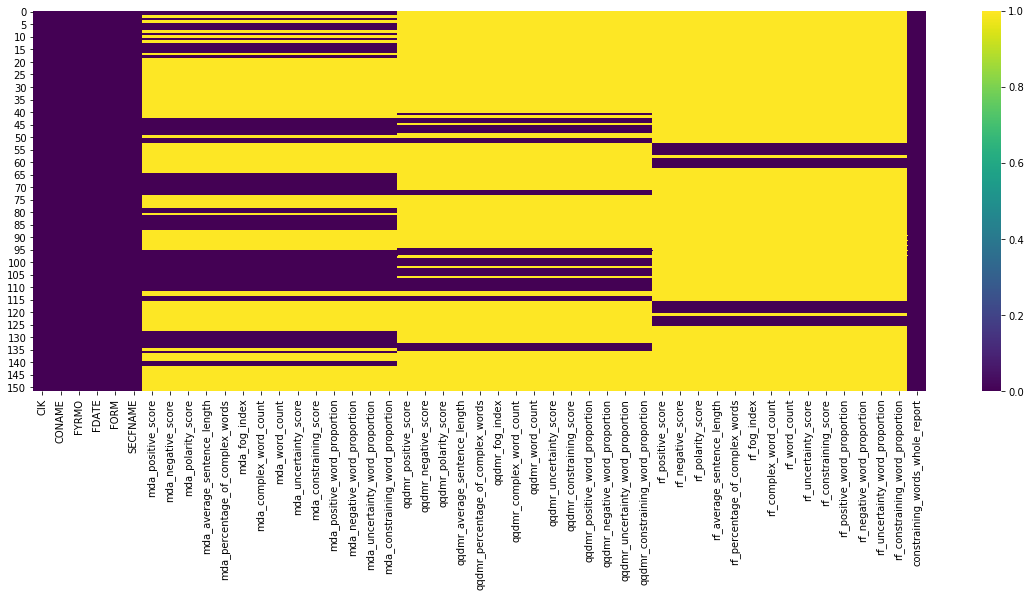

In [33]:
plt.figure(figsize=(20, 7))
sns.heatmap(df_rf.isnull(), cmap='viridis') 